# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Specify the folder path in your Google Drive
folder_path = '/content/drive/MyDrive/CIC-IDS- 2017'  # Replace 'CIC-IDS-2017' with the actual folder name

# Get the list of file names in the folder
file_names = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file in the folder
for file_name in file_names:
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate the list of DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(combined_df)


Mounted at /content/drive
          Destination Port   Flow Duration   Total Fwd Packets  \
0                       22         1266342                  41   
1                       22         1319353                  41   
2                       22             160                   1   
3                       22         1303488                  41   
4                    35396              77                   1   
...                    ...             ...                 ...   
2830738                 53           32215                   4   
2830739                 53             324                   2   
2830740              58030              82                   2   
2830741                 53         1048635                   6   
2830742                 53           94939                   4   

          Total Backward Packets  Total Length of Fwd Packets  \
0                             44                         2664   
1                             44                   

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
set(list(df.dtypes))

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
import pandas as pd

# Assuming df is the combined DataFrame
categorical_columns = [col for col in df.columns if df[col].dtype == "O"]

# Detect the label column dynamically
label_column = next((col for col in df.columns if 'label' in col.lower()), None)

if label_column:
    # Map "BENIGN" to itself and all other values to "INTRUSION"
    df[label_column] = df[label_column].map(lambda x: "BENIGN" if x == "BENIGN" else "INTRUSION")

    # Print the unique values in the modified label column
    print(df[label_column].unique())
else:
    print("Label column not found in the DataFrame.")

# Rest of your code using the categorical_columns variable...

['BENIGN' 'INTRUSION']


In [ ]:
df_Categorical=df[categorical_columns]
df_Categorical

,Label
0,BENIGN
1,BENIGN
2,BENIGN
3,BENIGN
4,BENIGN
...,...
692698,BENIGN
692699,BENIGN
692700,BENIGN
692701,BENIGN


In [ ]:
df_Numerical=df.copy()
df_Numerical.drop([" Label"],axis=1,inplace=True)

df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


( Label
 BENIGN       440031
 INTRUSION    252672
 Name: count, dtype: int64,
 <Axes: xlabel=' Label', ylabel='count'>)

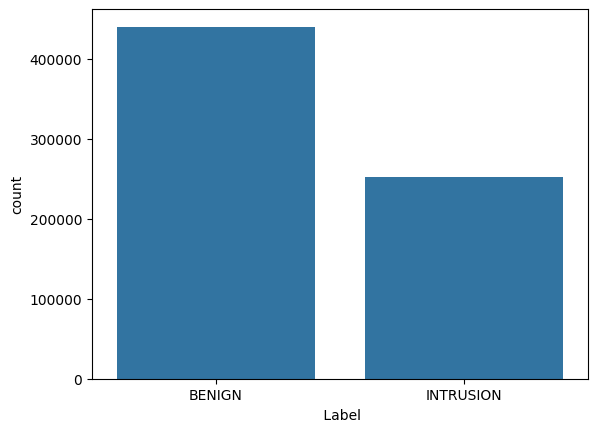

In [ ]:
df_Categorical[" Label"].value_counts(),sns.countplot(x=df_Categorical[' Label'])

In [ ]:
for i in df_Numerical.columns:
    #if df[i].unique()<
    print(f" {i} Column has {df[i].nunique()} unique values and those are {df[i].unique()}\n\n")

In [ ]:
for i in df_Numerical.columns:
    if df[i].isnull().sum()>0:
        print(i)

Flow Bytes/s


In [ ]:
df_Numerical["Flow Bytes/s"].isnull().sum()

1008

In [ ]:
for index, row in df_Numerical.iterrows():
    if pd.isna(row["Flow Bytes/s"]):
        print(row["Flow Bytes/s"],df_Categorical[" Label"].iloc[index])

In [ ]:
df_Numerical.dropna(inplace=True)

# Infinity Valued Column Detection

In [ ]:
np.all(np.isfinite(df_Numerical.values))

False

In [ ]:
np.isinf(df_Numerical).values.sum()

578

In [ ]:
infinite_column_count = {}
infinite_Value_index_num = []

for column in df_Numerical.columns:
    count = 0
    for index, value in enumerate(df_Numerical[column]):
        if not np.isfinite(value):
            count += 1
            infinite_Value_index_num.append(index)
    if count > 0:
        infinite_column_count[column] = count

infinite_Value_index_num = set(infinite_Value_index_num)

print("Counts of non-numeric (infinite) values in each column:")
print(f"{infinite_column_count}\n")

print("Index numbers of non-numeric (infinite) values:")
print(infinite_Value_index_num)

Counts of non-numeric (infinite) values in each column:
{'Flow Bytes/s': 289, ' Flow Packets/s': 289}

Index numbers of non-numeric (infinite) values:
{659968, 578052, 589320, 639498, 355852, 436748, 537101, 477199, 637968, 21521, 672784, 569875, 3097, 657945, 21021, 9758, 583197, 420896, 682527, 607267, 408613, 424997, 14375, 499749, 420908, 436780, 352302, 548909, 481328, 666668, 572473, 389690, 441914, 608255, 625657, 389694, 412738, 311364, 610886, 438343, 415816, 394315, 568395, 523855, 191568, 349776, 660562, 636501, 63062, 24152, 361560, 383577, 493145, 423004, 500825, 538715, 647258, 685662, 7780, 25702, 147558, 335976, 366694, 393832, 431210, 555115, 26221, 48237, 13423, 8816, 423023, 334962, 314994, 486003, 383606, 599670, 594040, 324217, 416377, 425594, 29825, 348290, 681601, 26244, 51334, 340615, 455303, 431241, 339082, 514184, 336015, 541842, 450707, 20632, 429209, 621721, 625818, 407708, 466079, 639142, 393383, 426152, 649895, 683690, 15019, 40620, 474797, 476340, 357557,

In [ ]:
Benign=0
Intrusion=0
for i in infinite_Value_index_num:
    if df_Categorical[" Label"].iloc[i]=="BENIGN":
        Benign+=1
    else:
        Intrusion+=1

print(f" Normal counts are {Benign}\n\n")
print(f" Intrusion counts are {Intrusion}")

 Normal counts are 276


 Intrusion counts are 13


In [ ]:
df_Numerical.replace([np.inf, -np.inf], np.nan, inplace=True)
df_Numerical.dropna(inplace=True)

In [ ]:
np.all(np.isinf(df_Numerical)),np.any(np.isnan(df_Numerical))

(False, False)

In [ ]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [ ]:
df_Numerical.shape,df_Categorical.shape

((691406, 78), (692703, 1))

In [ ]:
index_numbers_to_fetch = df_Numerical.index.tolist()

df_Categorical = df_Categorical.loc[index_numbers_to_fetch]

df_Categorical.shape

(691406, 1)

In [ ]:
y=pd.get_dummies(data=df_Categorical[" Label"], drop_first=True)
y

,INTRUSION
0,False
1,False
2,False
3,False
4,False
...,...
692698,False
692699,False
692700,False
692701,False


In [ ]:
df_Numerical

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,0,20,0.0,0.0,0,0,0.0,0.0,0,0
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,10,32,0.0,0.0,0,0,0.0,0.0,0,0
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.000000,0.000000,...,3,20,0.0,0.0,0,0,0.0,0.0,0,0
692699,53,324,2,2,84,362,42,42,42.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
692700,58030,82,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
692701,53,1048635,6,2,192,256,32,32,32.000000,0.000000,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


# Min Max Scaler / Standarization

In [ ]:
df_Numerical_Scaled_data=pd.DataFrame()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_Numerical_Scaled_data[df_Numerical.columns] = scaler.fit_transform(df_Numerical[df_Numerical.columns])

df_Numerical_Scaled_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.001222,3.192417e-04,0.000000,0.000004,0.000005,9.569378e-09,0.000242,0.002906,0.001293,0.000000,...,0.000000,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.005940,4.000000e-06,0.000049,0.000018,0.000141,5.199362e-07,0.003183,0.000000,0.003369,0.004892,...,0.000020,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001344,9.133333e-06,0.000044,0.000022,0.002573,5.023923e-06,0.063457,0.000000,0.067877,0.098389,...,0.000015,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.005940,1.267250e-04,0.000078,0.000044,0.002820,1.062201e-05,0.052901,0.000000,0.043756,0.066226,...,0.000051,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001344,9.108333e-06,0.000039,0.000022,0.002573,5.027113e-06,0.063457,0.000000,0.075419,0.108024,...,0.000010,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691401,0.000809,2.684667e-04,0.000015,0.000007,0.000091,2.424242e-07,0.001128,0.013559,0.006033,0.000000,...,0.000015,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691402,0.000809,2.708333e-06,0.000005,0.000007,0.000069,5.773525e-07,0.001692,0.020339,0.009050,0.000000,...,0.000005,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691403,0.886130,6.916667e-07,0.000005,0.000004,0.000025,9.569378e-09,0.001249,0.000000,0.003340,0.003409,...,0.000000,0.540984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
691404,0.000809,8.738633e-03,0.000025,0.000007,0.000157,4.082935e-07,0.001289,0.015496,0.006895,0.000000,...,0.000025,0.344262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X=df_Numerical_Scaled_data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape


((463242, 78), (463242, 1), (228164, 78), (228164, 1))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import *

accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 96.94430322049053
Confusion Matrix
[[141509   3673]
 [  3299  79683]]


# Fitting Different Models

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Quick Analysis and Results

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_model(model, X_train, y_train):
    y_train = y_train.values.ravel() if len(y_train.shape) > 1 and y_train.shape[1] == 1 else y_train
    model.fit(X_train, y_train)

def evaluate_model(model, X, y, dataset_name):
    accuracy = accuracy_score(y, model.predict(X))
    confusion_matrix_result = confusion_matrix(y, model.predict(X))
    classification = classification_report(y, model.predict(X))

    print(f'{dataset_name} Model Evaluation')
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix_result)
    print()
    print("Classification report:\n", classification)
    print()

X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2, random_state=42)

classifiers = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('Logistic Regression', LogisticRegression(n_jobs=-1, random_state=0))
]

models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Logistic Regression', LogisticRegression(n_jobs=-1, random_state=0)),
    ('Voting Classifier', VotingClassifier(estimators=classifiers, voting='soft'))
]

# Train and evaluate individual models
for model_name, model in models:
    train_model(model, X_train, y_train)
    evaluate_model(model, X_train, y_train, f'Training - {model_name}')
    evaluate_model(model, X_test, y_test, f'Test - {model_name}')




Training - Naive Baye Classifier Model Evaluation

Model Accuracy:
 0.8217199036744022

Confusion matrix:
 [[273087  78713]
 [ 19898 181426]]

Classification report:
               precision    recall  f1-score   support

       False       0.93      0.78      0.85    351800
        True       0.70      0.90      0.79    201324

    accuracy                           0.82    553124
   macro avg       0.81      0.84      0.82    553124
weighted avg       0.85      0.82      0.82    553124


Test - Naive Baye Classifier Model Evaluation

Model Accuracy:
 0.8237225380020538

Confusion matrix:
 [[68336 19547]
 [ 4829 45570]]

Classification report:
               precision    recall  f1-score   support

       False       0.93      0.78      0.85     87883
        True       0.70      0.90      0.79     50399

    accuracy                           0.82    138282
   macro avg       0.82      0.84      0.82    138282
weighted avg       0.85      0.82      0.83    138282


Training - Logisti


# **Stacking**

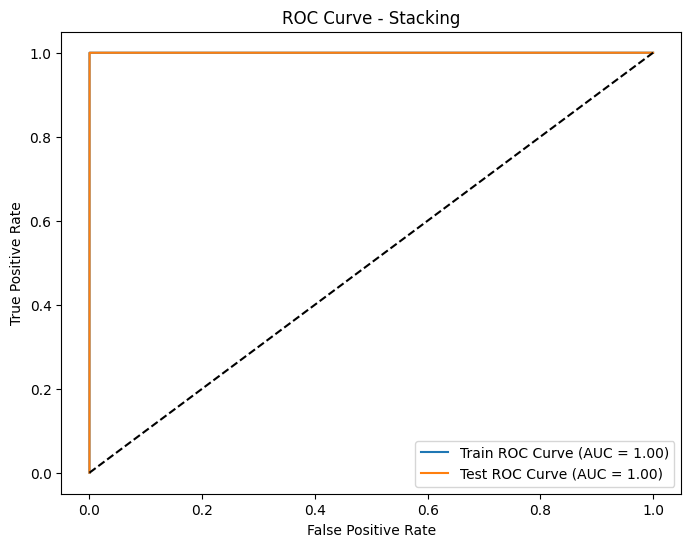

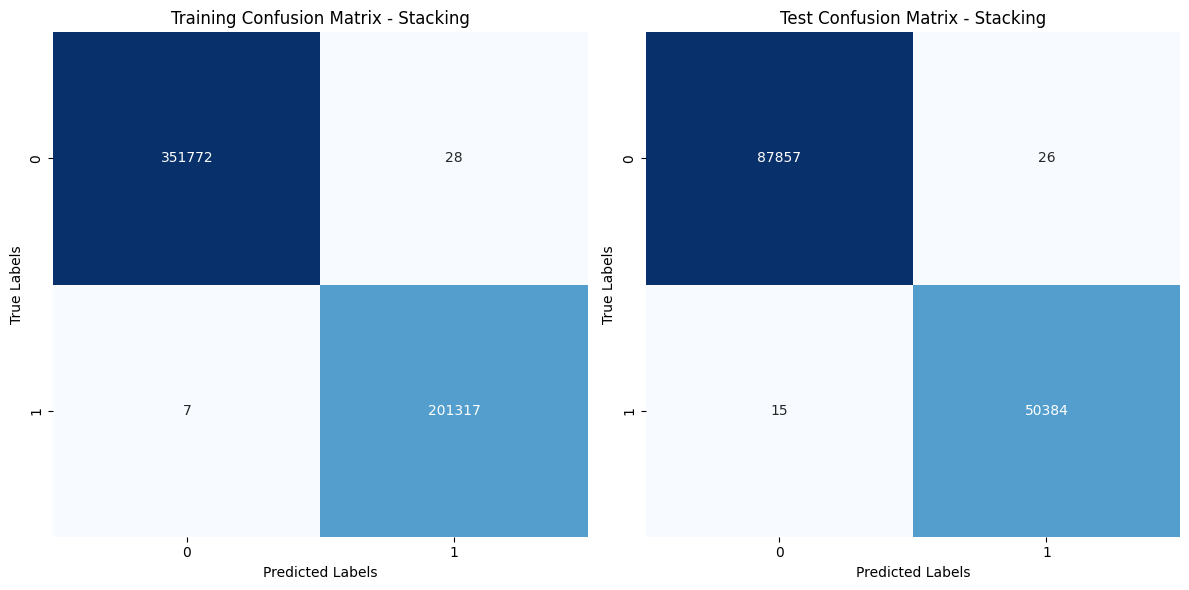

Stacking Model Evaluation

Train Accuracy: 0.9999367230494428
Test Accuracy: 0.9997035044329703
F1 Score: 0.9995932902816218
Precision: 0.9994842293195795
Recall: 0.999702375047124
ROC AUC (Train): 0.9999619980058335
ROC AUC (Test): 0.9998862821145618



In [ ]:
def evaluate_model_extended(model, X_train, y_train, X_test, y_test, dataset_name):
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    f1_score_val = f1_score(y_test, model.predict(X_test))
    precision_val = precision_score(y_test, model.predict(X_test))
    recall_val = recall_score(y_test, model.predict(X_test))

    # Calculate ROC curve and AUC
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {dataset_name}')
    plt.legend()
    plt.show()

    # Calculate confusion matrix
    train_conf_matrix = confusion_matrix(y_train, model.predict(X_train))
    test_conf_matrix = confusion_matrix(y_test, model.predict(X_test))

    # Plot confusion matrix
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
    axes[0].set_title(f'Training Confusion Matrix - {dataset_name}')
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')

    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
    axes[1].set_title(f'Test Confusion Matrix - {dataset_name}')
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_ylabel('True Labels')

    plt.tight_layout()
    plt.show()

    # Print evaluation metrics
    print(f'{dataset_name} Model Evaluation')
    print()
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("F1 Score:", f1_score_val)
    print("Precision:", precision_val)
    print("Recall:", recall_val)
    print("ROC AUC (Train):", roc_auc_train)
    print("ROC AUC (Test):", roc_auc_test)
    print()
# Implement Stacking
base_model_predictions_train = []
base_model_predictions_test = []

# Generate predictions from base models for training and test data
for model_name, model in classifiers:
    train_model(model, X_train, y_train)
    base_model_predictions_train.append(model.predict(X_train))
    base_model_predictions_test.append(model.predict(X_test))

# Train meta-model (Voting Classifier) on predictions from base models
stacked_X_train = np.column_stack(base_model_predictions_train)
stacked_X_test = np.column_stack(base_model_predictions_test)

stacked_model = VotingClassifier(estimators=classifiers, voting='soft')
train_model(stacked_model, stacked_X_train, y_train)

# Evaluate stacked model
evaluate_model_extended(stacked_model, stacked_X_train, y_train, stacked_X_test, y_test, "Stacking")


In [ ]:
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show()
    elif 'Voting Classifier' in model_name:
        # Voting classifier doesn't have feature importances
        print(f"No feature importances for {model_name}")
    else:
        # Handle other models if needed
        pass


No feature importances for Voting Classifier


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


# Visualisations Using ROC & Precision-Recall Curve

In [ ]:
def split_data(X, y, test_size=0.2, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

def evaluate_model(model, X, y):
    y = np.ravel(y)

    X_np = np.array(X)

    y_pred = model.predict(X_np)

    accuracy = accuracy_score(y, y_pred)
    confusion_matrix_result = confusion_matrix(y, y_pred)
    classification = classification_report(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)

    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix_result,
        'classification_report': classification,
        'f1_score': f1,
        'precision': precision,
        'recall': recall
    }


In [ ]:
def plot_roc_curve(fpr, tpr, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {}'.format(model_name))
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(precision, recall, auc, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(auc))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for {}'.format(model_name))
    plt.legend(loc='lower left')
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


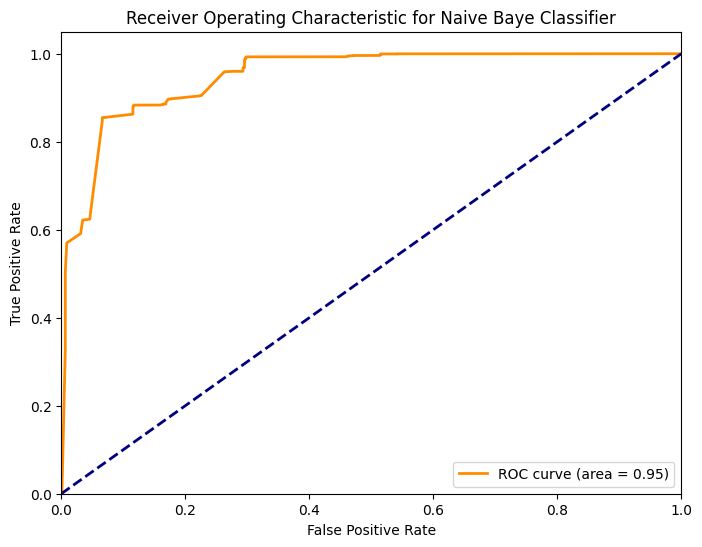

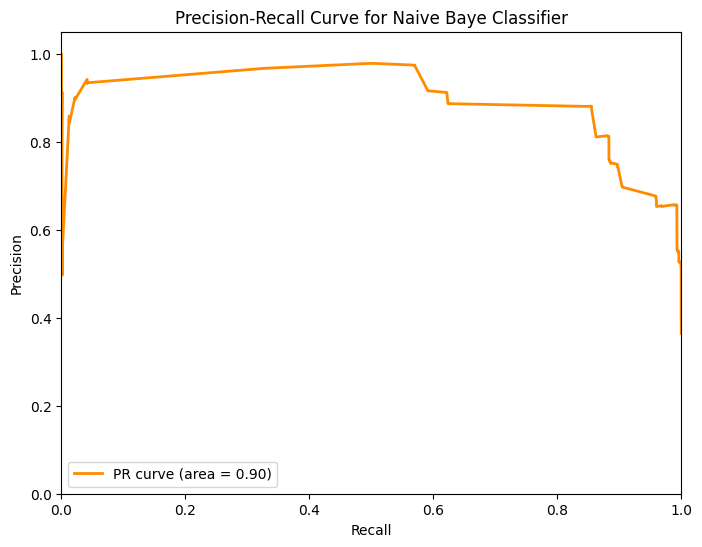

<ipython-input-48-c8a1ed5953ad>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


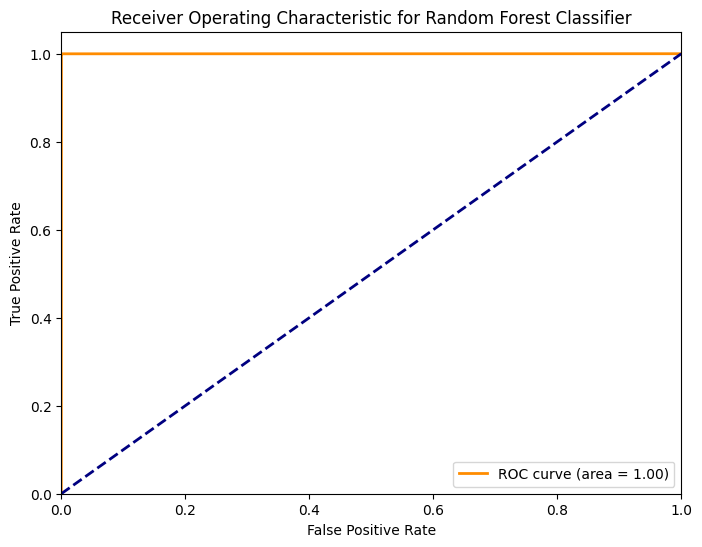

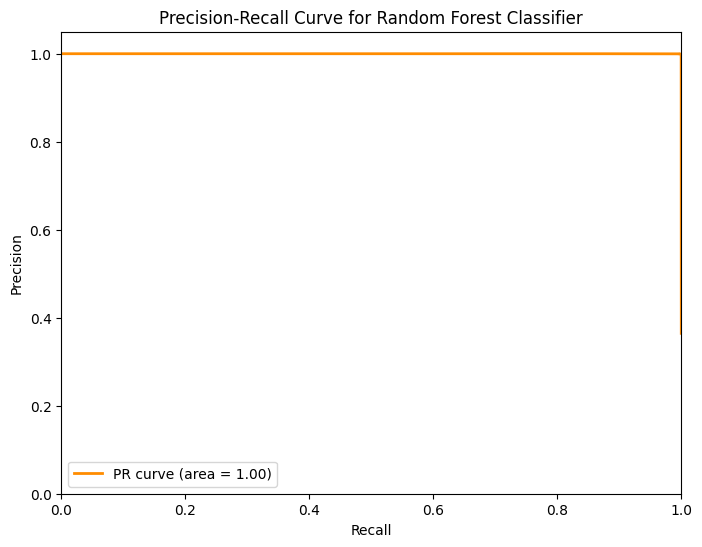

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


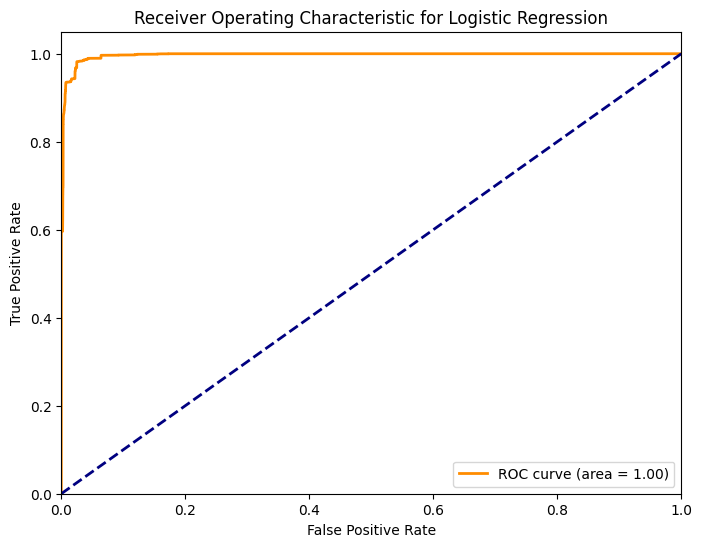

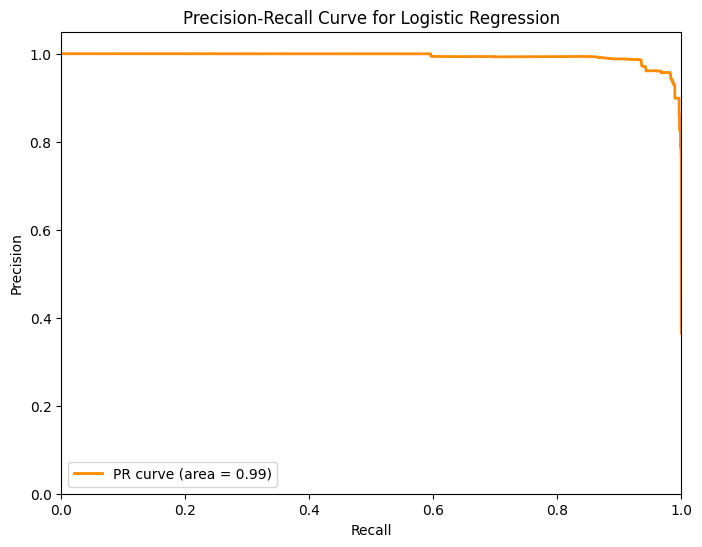

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does no

                      Model  Train Accuracy  Test Accuracy  F1 Score  \
0     Naive Baye Classifier        0.821720       0.823723  0.788982   
1  Random Forest Classifier        0.999669       0.999573  0.999415   
2       Logistic Regression        0.972109       0.972585  0.962604   
3         Voting Classifier        0.998968       0.998633  0.998128   

   Precision    Recall  
0   0.699817  0.904185  
1   0.999108  0.999722  
2   0.957156  0.968114  
3   0.996519  0.999742  


In [ ]:
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Random Forest Classifier', RandomForestClassifier(n_estimators=100, random_state=0)),
    ('Logistic Regression', LogisticRegression(n_jobs=-1, random_state=0)),
    ('Voting Classifier', VotingClassifier(estimators=classifiers, voting='soft'))
]


results_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall'])

for model_name, model in models:
    train_model(model, X_train, y_train)
    train_evaluation = evaluate_model(model, X_train, y_train)
    test_evaluation = evaluate_model(model, X_test, y_test)

    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [model_name],
        'Train Accuracy': [train_evaluation['accuracy']],
        'Test Accuracy': [test_evaluation['accuracy']],
        'F1 Score': [test_evaluation['f1_score']],
        'Precision': [test_evaluation['precision']],
        'Recall': [test_evaluation['recall']],
    })], ignore_index=True)

    if model_name != 'Voting Classifier':
      y_prob = model.predict_proba(X_test)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_prob)
      roc_auc = auc(fpr, tpr)

      precision, recall, _ = precision_recall_curve(y_test, y_prob)
      pr_auc = auc(recall, precision)

      plot_roc_curve(fpr, tpr, roc_auc, model_name)
      plot_precision_recall_curve(precision, recall, pr_auc, model_name)

print(results_df)

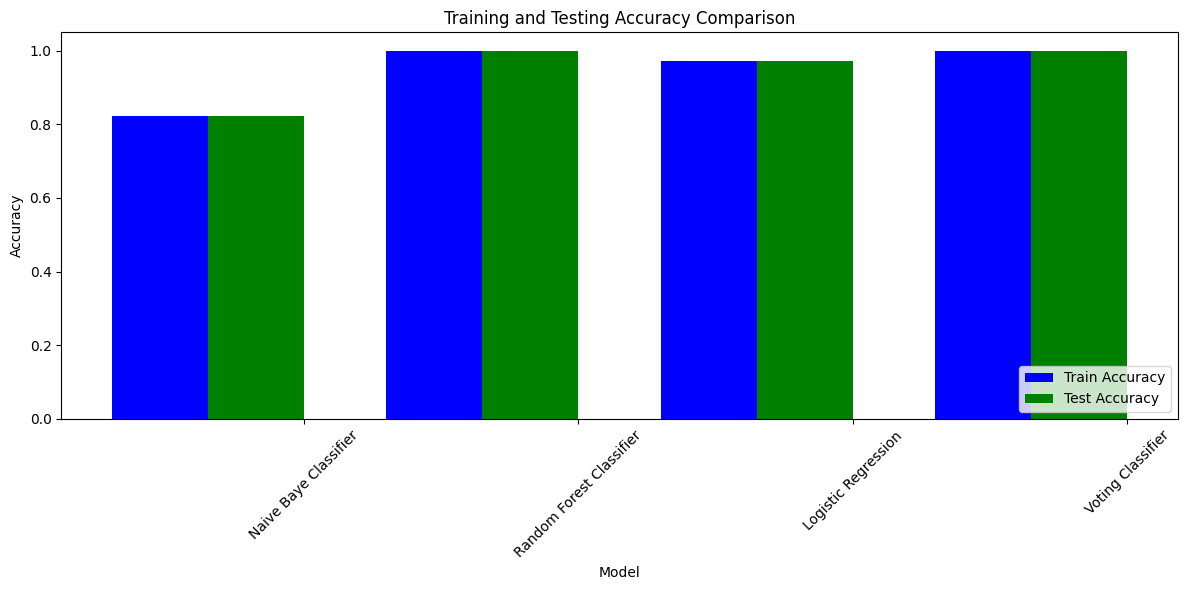

In [ ]:
accuracy_metrics = ['Train Accuracy', 'Test Accuracy']
model_names = results_df['Model']
num_models = len(models)

bar_width = 0.35

indices = np.arange(len(model_names))

colors = ['b', 'g']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(accuracy_metrics):
    x_positions = [ind + i * bar_width for ind in indices]

    metric_values = results_df[metric]

    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


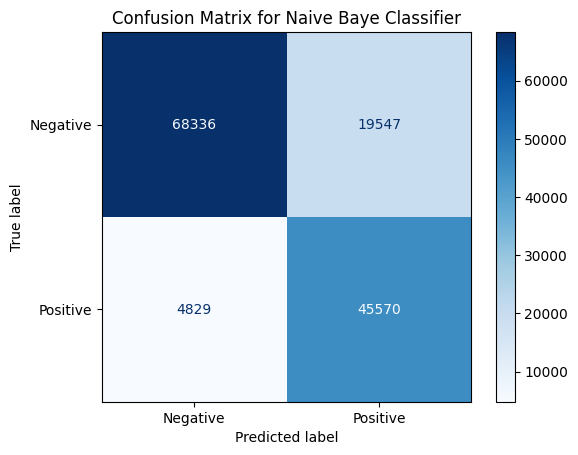

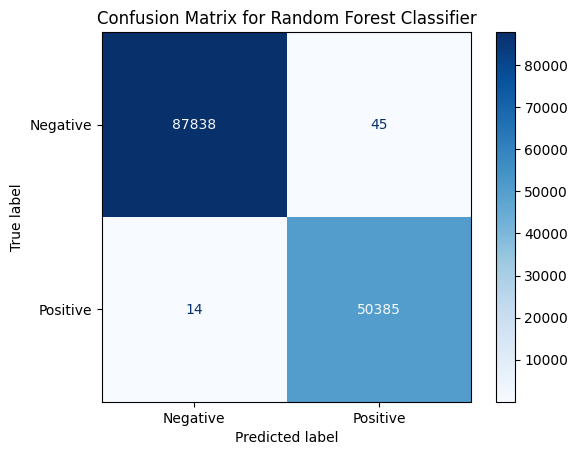

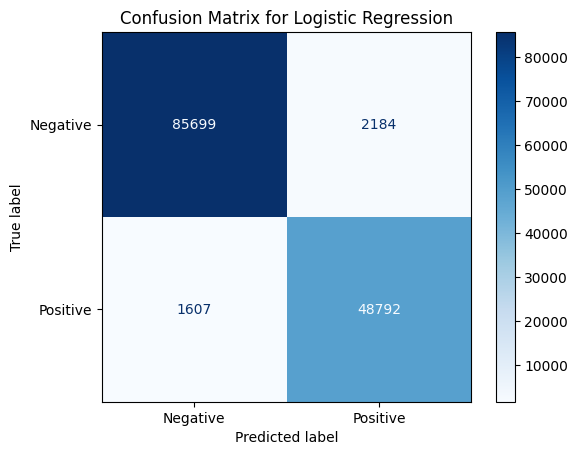

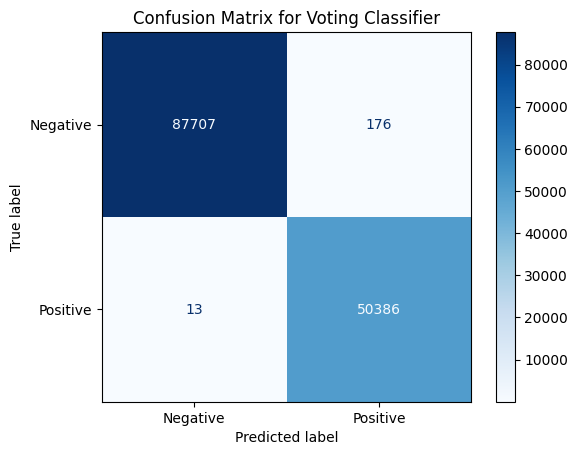

In [ ]:
for model_name, model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

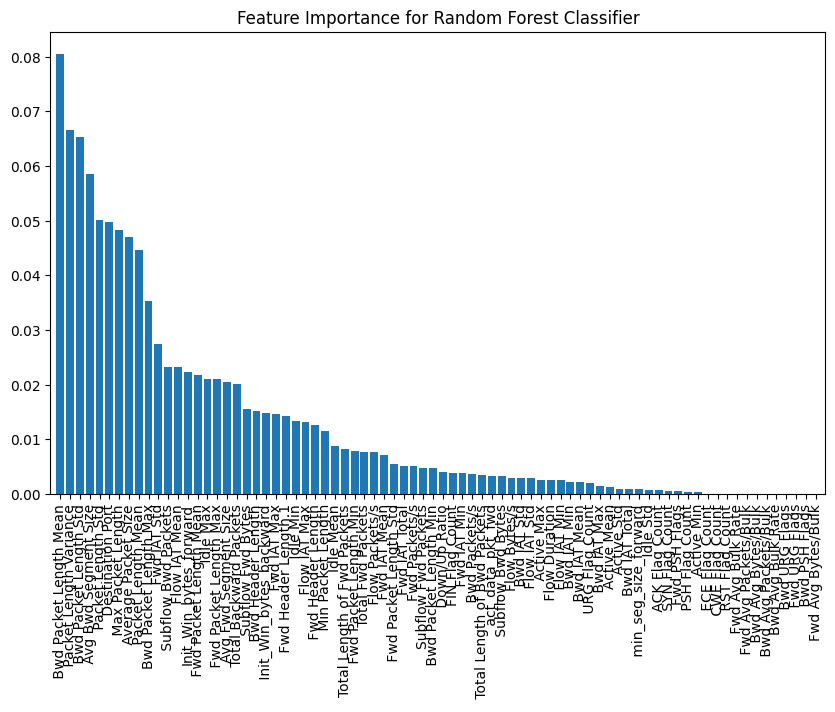

In [ ]:
for model_name, model in models:
    if 'Decision Tree' in model_name or 'Random Forest' in model_name:
        importances = model.feature_importances_
        feature_names = X.columns
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(10, 6))
        plt.title(f'Feature Importance for {model_name}')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.show

# Visualize learning curves for each model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

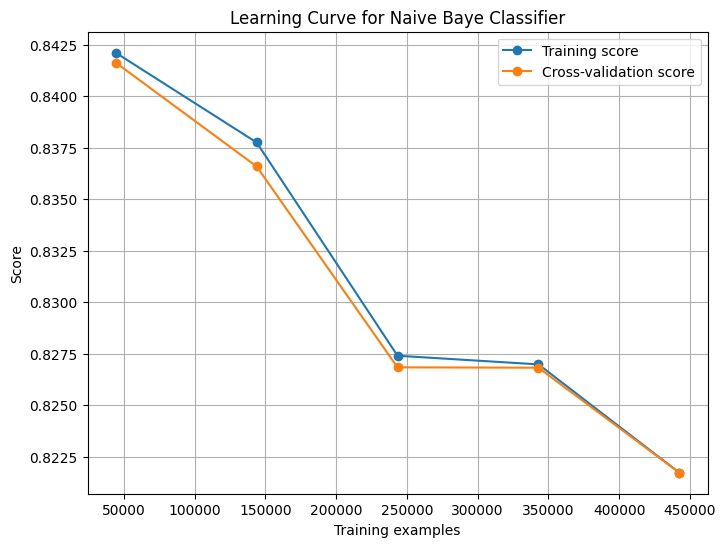

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

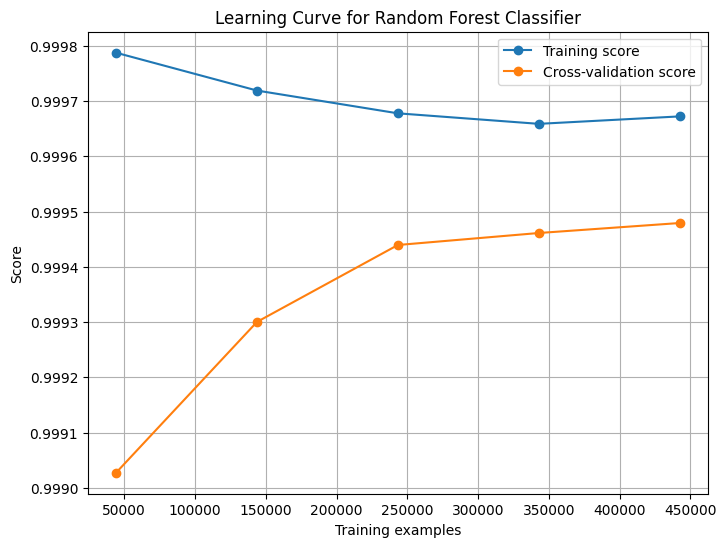

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

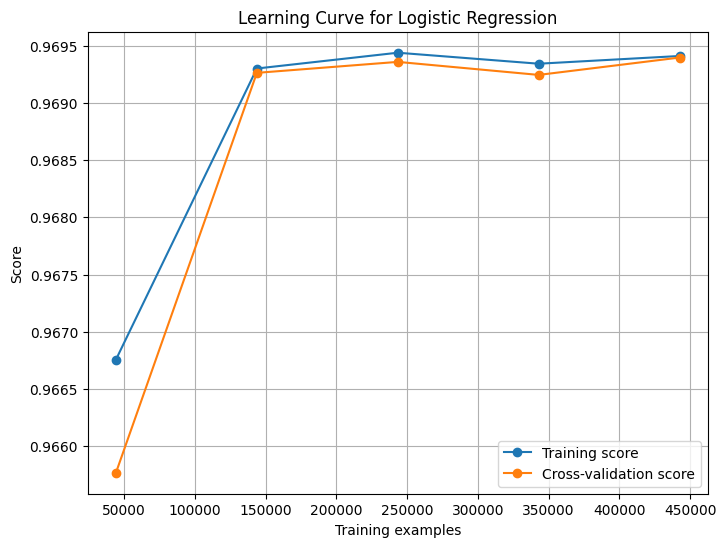

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

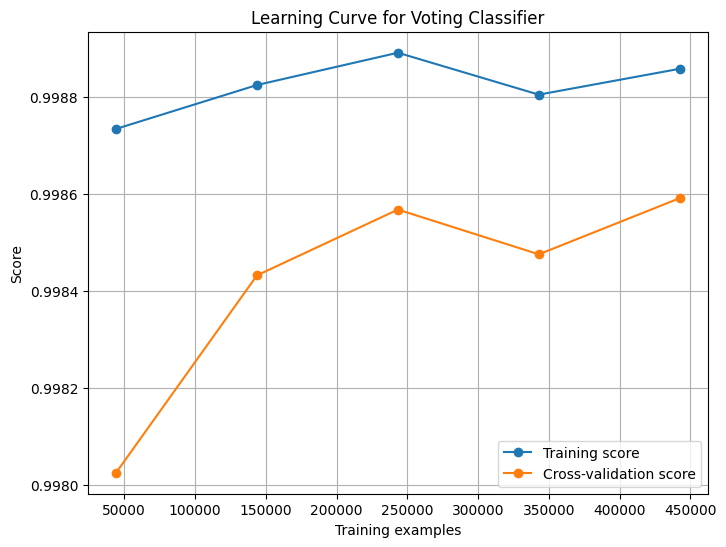

In [ ]:
from sklearn.model_selection import learning_curve

for model_name, model in models:
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

# Create a grouped bar plot for comparing multiple metrics across models

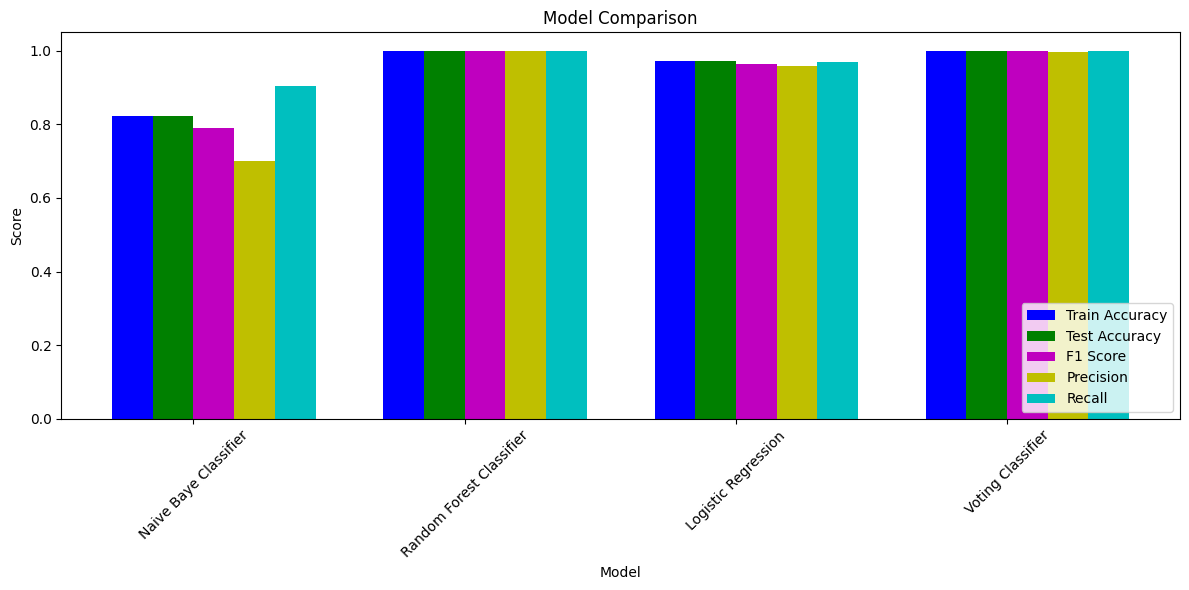

In [ ]:
metrics_to_compare = ['Train Accuracy', 'Test Accuracy', 'F1 Score', 'Precision', 'Recall']
model_names = results_df['Model']
num_models = len(models)

bar_width = 0.15

indices = np.arange(len(model_names))

colors = ['b', 'g', 'm', 'y','c']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics_to_compare):
    x_positions = [ind + i * bar_width for ind in indices]

    metric_values = results_df[metric]

    plt.bar(x_positions, metric_values, width=bar_width, label=metric, color=colors[i])

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(indices + (bar_width * (num_models - 1)) / 2, model_names, rotation=45)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()